# Tugas Data Visualization 1

* Silakan download dan kerjakan soal berikut dimanapun (laptop pribadi/google colab/etc.)
* Setelah selesai mengerjakan, upload file ini di tempat yang telah disediakan pada platform.
* Beri nama file seperti berikut: {username}-dataviz-1.ipynb
* Contoh: johndoe-ab12-dataviz-1.ipynb
* Tutorial: https://discourse.pacmann.ai/t/pengumuman-seluruh-platform-pacmann-ai/409
* Username dapat dilihat di dalam akun anda.
* Mohon jangan mengubah nama variabel yang telah diberikan.
* Namun anda diperbolehkan untuk menambah variabel apapun.
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings 

warnings.simplefilter(action='ignore', category=FutureWarning)

##### Catatan: Anda diperbolehkan menggunakan matplotlib atau seaborn

### 1.A. Diberikan distribusi nilai ujian fisika pada angkatan A dan B. Untuk membandingkan distribusi kedua kelompok, gunakan boxplot. *(10 poin)*

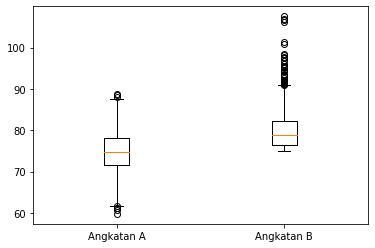

In [2]:
np.random.seed(0)
angkatan_A = 75 + np.random.randn(1000) * 5
angkatan_B = 75 + np.random.gamma(1,1,size=1000)*5
data = [angkatan_A,angkatan_B]

# tulis code Anda di sini
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Angkatan A', 'Angkatan B'])

plt.show()

### 1.B. Dengan data pada nomor 1, plot distribusinya menggunakan histogram, sajikan kedua histogram pada 2 axes yang berbeda. *(10 poin)*

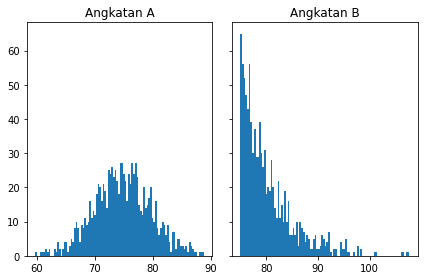

In [3]:
# tulis code Anda di sini
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(angkatan_A, bins=100);
axs[0].set_title('Angkatan A');

axs[1].hist(angkatan_B, bins=100);
axs[1].set_title('Angkatan B');

### 1.C. Diberikan range pada sumbu X dan Y. Jika diberikan persamaan  *(10 poin)*
$$ Z = X^2 - Y^2 $$

Plot kontur dari $Z$ dengan menggunakan `contourf`

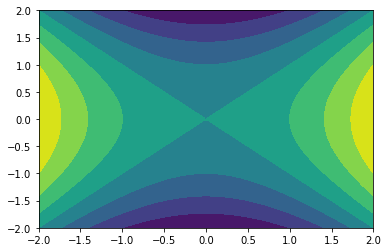

In [4]:
N = 100
x = np.linspace(-2.0, 2.0, N)
y = np.linspace(-2.0, 2.0, N)
X, Y = np.meshgrid(x, y)

Z = X**2 - Y**2

# tulis code Anda di sini
fig, ax=plt.subplots(1,1)
cp = ax.contourf(x, y, Z)
plt.show()

Terdapat dataset publik: Housing Price. Dataset ini berisi berbagai informasi mengenai properti-properti yang dijual, misalnya jumlah kamar tidur, ukuran tanah, dll. Namun, dalam tugas kali ini kita hanya akan menggunakan kolom:

* MSZoning: Klasifikasi zona lokasi properti
  * RH: Zona perumahan padat
  * RM: Zona perumahan sedang
  * RL: Zona perumahan lengang

* SalePrice: Harga jual properti dalam USD

### Import Data

In [5]:
# Prepare dataset -- sesuaikan dengan direktori Anda
df = pd.read_csv('train_house.csv', index_col=0)

house = df[['MSZoning', 'SalePrice']]
house

,MSZoning,SalePrice
Id,,
1,RL,208500
2,RL,181500
3,RL,223500
4,RL,140000
5,RL,250000
...,...,...
1456,RL,175000
1457,RL,210000
1458,RL,266500


### Check Missing Data

In [6]:
# Cek apakah ada data yang kosong -- jangan diganti

total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MSZoning,0,0.0
SalePrice,0,0.0


### 2. Buat histogram data `SalePrice` untuk kategori `MSZoning` `RH`, `RM`, dan `RL`  *(40 poin)*

In [7]:
# Mencari tahu kategori dalam MSZoning
kategori = house.MSZoning.unique()
print('Kategori MSZoning = ', kategori)

Kategori MSZoning =  ['RL' 'RM' 'C (all)' 'FV' 'RH']


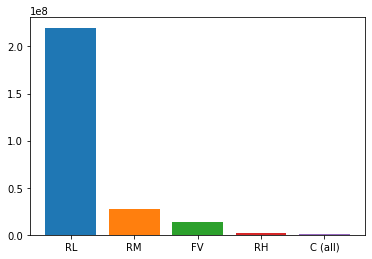

In [8]:
# tulis code Anda di sini
datax = house.groupby(['MSZoning']).sum().reset_index().sort_values(by=['SalePrice'], ascending=False)

SalePrice = datax.SalePrice
MSZoning = datax.MSZoning

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.bar(MSZoning, SalePrice, color=colors)
plt.show()

In [9]:
RH = house.SalePrice.loc[house.MSZoning == 'RH']
# tulis code Anda di sini
print(f'Mean RH = {np.mean(RH)}')
print(f'Median RH = {np.median(RH)}')
print(f'Mode RH = {RH.mode()[0]}')

Mean RH = 131558.375
Median RH = 136500.0
Mode RH = 145000


In [10]:
RM = house.SalePrice.loc[house.MSZoning == 'RM']
# tulis code Anda di sini
print(f'Mean RH = {np.mean(RM)}')
print(f'Median RH = {np.median(RM)}')
print(f'Mode RH = {RM.mode()[0]}')

Mean RH = 126316.83027522935
Median RH = 120500.0
Mode RH = 115000


In [11]:
# Central tendency RL
RL = house.SalePrice.loc[house.MSZoning == 'RL']
# tulis code Anda di sini
print(f'Mean RH = {np.mean(RL)}')
print(f'Median RH = {np.median(RL)}')
print(f'Mode RH = {RL.mode()[0]}')

Mean RH = 191004.99478714162
Median RH = 174000.0
Mode RH = 135000


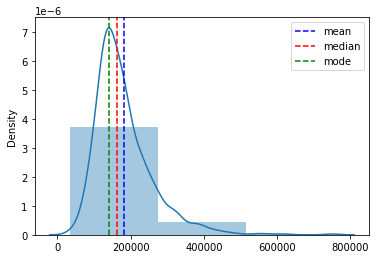

In [25]:
x = np.array(house.SalePrice)

sns.distplot(x, bins=3)
line1 = plt.axvline(np.mean(x), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='median')
line3 = plt.axvline(np.array(stats.mode(x)), color='g', linestyle='--', label='mode')
first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
plt.show()

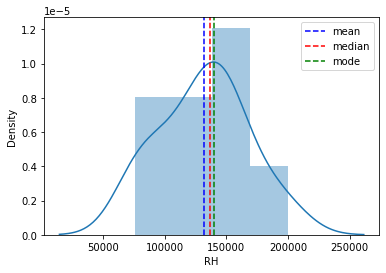

In [41]:
# tulis code Anda di sini
...


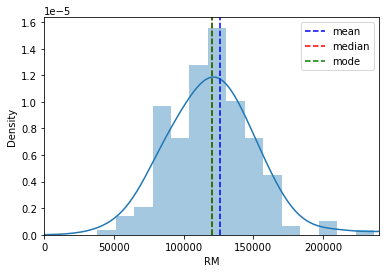

In [42]:
# tulis code Anda di sini
...


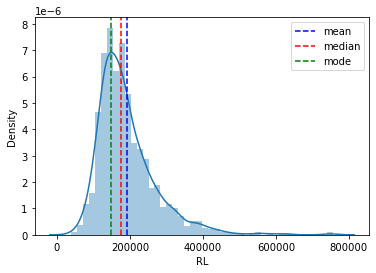

In [43]:
# tulis code Anda di sini
...


### 3. Tentukan bentuk tiap-tiap histogram!  *(5 poin)*

Jawab:
...

### 4. Buat analisis mengenai distribusi SalePrice dihubungkan dengan informasi mengenai MSZoning!  *(25 poin)*

Tulis analisis Anda di sini!
...